**Description**: Analyze accuracies for $n = 200$.

**Estimated runtime**: ~45 min. (Multi-core isn't working on my machine. Set `cores=4`
in the `model.fit` call if it works for you.)

In [1]:
from typing import Literal

import seaborn as sns

import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
sns.set_theme(style="darkgrid")

# Configuration

Which number of test observations do you want to analyze?

In [3]:
num_test: Literal[200, 500] = 200

# Load data

In [4]:
accuracies_home_dir = "accuracies_from_paper"
accuracy_df = utils.load_all_accuracies(accuracies_home_dir, num_test)  # for plot
num_correct_df = utils.load_all_num_correct(accuracies_home_dir, num_test)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + lm_type + (1|dataset/pair)"
id_vars = ["num_test", "pair", "lm_type", "dataset"]

# Plot

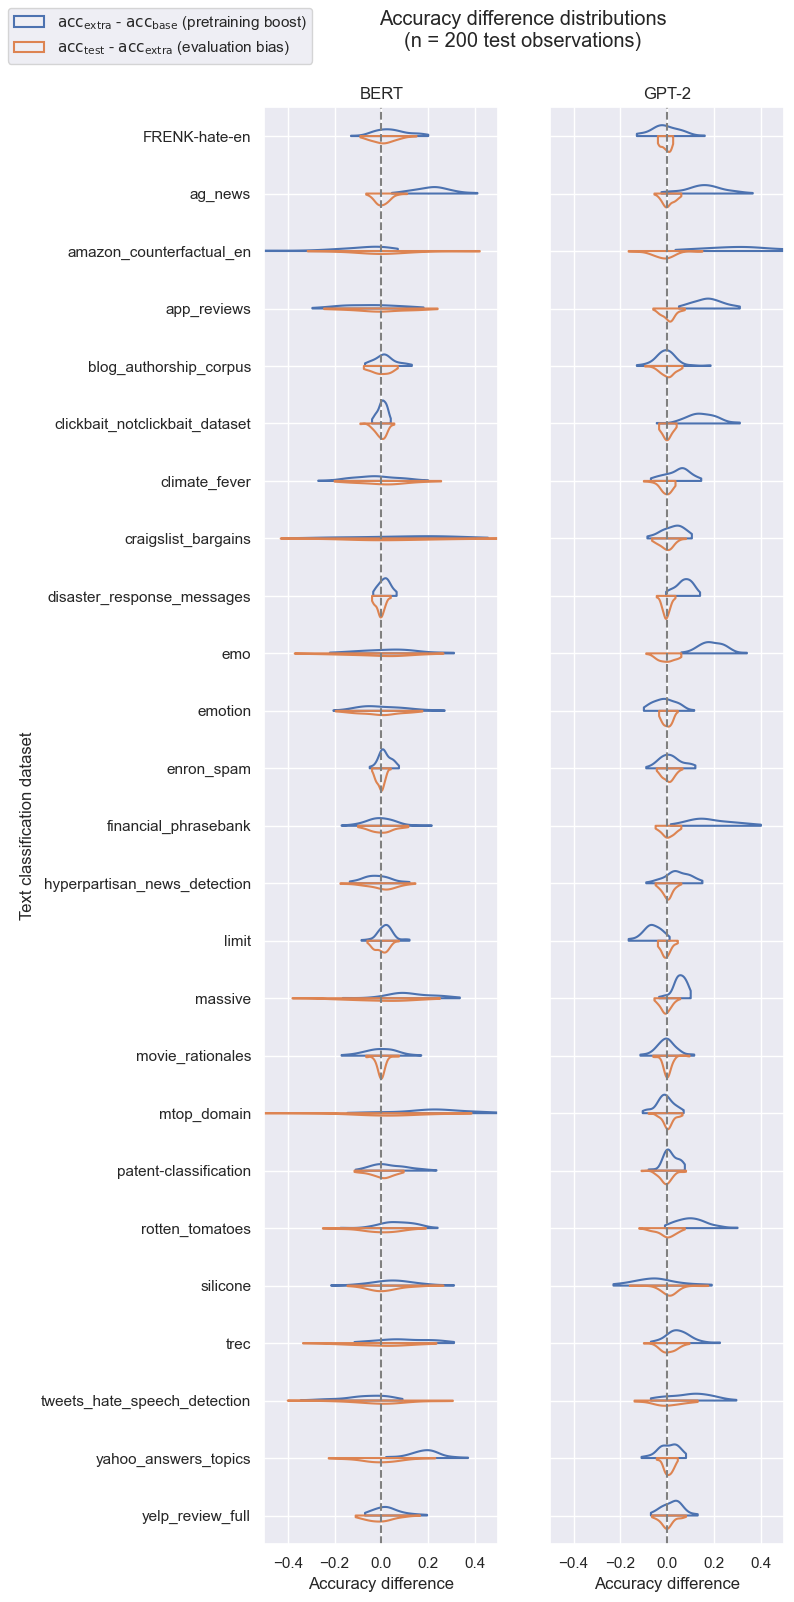

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test)

# Control

In [7]:
summary_control, summary_relative_control = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.051792 ┆ 0.010042 │
└──────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.235303 ┆ 0.055126 │
└──────────┴──────────┘


In [8]:
summary_control

dataset,mean,se
"""FRENK-hate-en""",0.0182,0.007115
"""ag_news""",0.1875,0.008441
"""amazon_counter…",0.111,0.025902
"""app_reviews""",0.06375,0.014664
"""blog_authorshi…",0.00485,0.004822
"""clickbait_notc…",0.07535,0.008675
"""climate_fever""",0.01015,0.008482
"""craigslist_bar…",0.064,0.015571
"""disaster_respo…",0.0427,0.004206
"""emo""",0.1112,0.012452


In [9]:
summary_relative_control

dataset,mean,se
"""FRENK-hate-en""",0.035745,0.012906
"""ag_news""",0.377502,0.021762
"""amazon_counter…",0.458375,0.09449
"""app_reviews""",0.740728,0.111095
"""blog_authorshi…",0.013204,0.009552
"""clickbait_notc…",0.121475,0.0148
"""climate_fever""",0.089837,0.030985
"""craigslist_bar…",0.236656,0.042941
"""disaster_respo…",0.05215,0.00526
"""emo""",0.501643,0.052985


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/formulae/terms/call.py:108: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_string_dtype(x) or is_categorical_dtype(x) or isinstance(x, CategoricalBox):
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 6202 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
method[extra],0.266,0.005,0.258,0.274,0.0,0.0,4762.0,2895.0,1.0


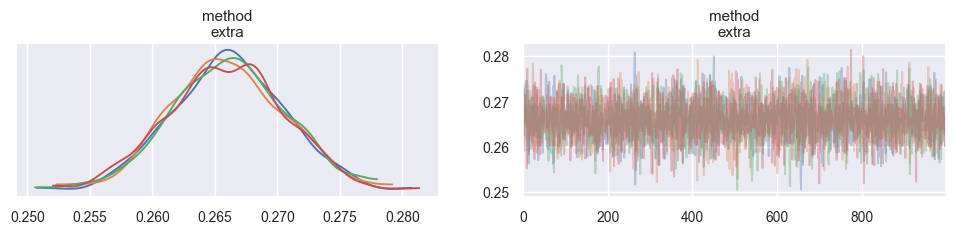

In [10]:
model_control, summary_control, az_summary_control = utils.stat_model(
    num_correct_df,
    treatment="extra",
    control="base",
    equation=equation,
    id_vars=id_vars,
)

In [11]:
print(model_control)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 5000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Treatment

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.001576 ┆ 0.001397 │
└──────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.026874 ┆ 0.008195 │
└──────────┴──────────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",0.002,0.003849
"""ag_news""",0.00565,0.002884
"""amazon_counter…",0.00615,0.012268
"""app_reviews""",0.0051,0.00856
"""blog_authorshi…",-0.00035,0.003538
"""clickbait_notc…",-0.00165,0.002256
"""climate_fever""",0.00295,0.00782
"""craigslist_bar…",0.0201,0.015235
"""disaster_respo…",-0.0039,0.001699
"""emo""",-0.01185,0.010479


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",0.00517,0.0066
"""ag_news""",0.009477,0.004188
"""amazon_counter…",0.034038,0.024227
"""app_reviews""",0.055319,0.034491
"""blog_authorshi…",0.001789,0.006656
"""clickbait_notc…",-0.00185,0.002726
"""climate_fever""",0.048042,0.033163
"""craigslist_bar…",0.119308,0.050728
"""disaster_respo…",-0.004123,0.001878
"""emo""",0.002637,0.023418


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/formulae/terms/call.py:108: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_string_dtype(x) or is_categorical_dtype(x) or isinstance(x, CategoricalBox):
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 7177 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
method[test],0.008,0.005,-0.0,0.017,0.0,0.0,4856.0,3298.0,1.0


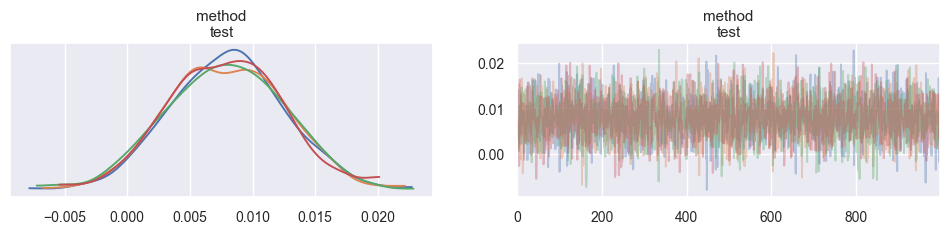

In [15]:
model_bias, summary_bias, az_summary_bias = utils.stat_model(
    num_correct_df,
    treatment="test",
    control="extra",
    equation=equation,
    id_vars=id_vars,
)

In [16]:
print(model_bias)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 5000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


In [17]:
summary_control.to_netcdf(filename=f"main_{num_test}_control.nc")

'main_200_control.nc'

In [ ]:
summary_bias.to_netcdf(filename=f"main_{num_test}_treatment.nc")